## 6.5.Unsupervised Machine Learning.

In [2]:
### Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [3]:
%matplotlib inline

In [4]:
### Set path
path=r'C:\Users\User\Downloads\Achievement 6'

In [5]:
### Import data set
df=pd.read_csv(os.path.join(path, 'Data',  'flavors_of_cacao_cleaned.csv'))

In [6]:
df.head()

,Unnamed: 0,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Broad Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,70.0,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Peru


In [7]:
### Create a dataset containing only numerical variables
df1 = df[['Review Date', 'Cocoa Percent', 'Rating']]

In [8]:
df1.head()

,Review Date,Cocoa Percent,Rating
0,2016,63.0,3.75
1,2015,70.0,2.75
2,2015,70.0,3.00
3,2015,70.0,3.50
4,2015,70.0,3.50


### The elbow technique

In [9]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [10]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

[-87508.73122212937,
 -51798.284945866995,
 -38716.733904693734,
 -26574.75197308817,
 -19641.144549717912,
 -15948.28015306855,
 -13516.50517874074,
 -12378.70739029588,
 -10860.663656047316]

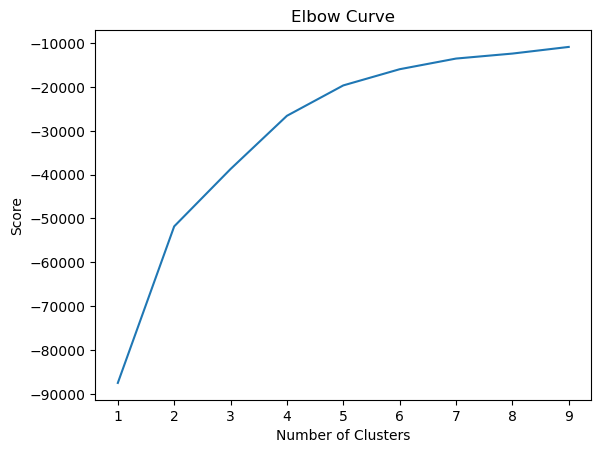

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The optimal count for clusters is 3

### k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df1)

KMeans(n_clusters=3)

In [14]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\User\AppData\Local\Temp\ipykernel_9508\865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [15]:
df1.head()

,Review Date,Cocoa Percent,Rating,clusters
0,2016,63.0,3.75,1
1,2015,70.0,2.75,1
2,2015,70.0,3.00,1
3,2015,70.0,3.50,1
4,2015,70.0,3.50,1


In [16]:
df1['clusters'].value_counts()

clusters
1    1219
0     489
2      86
Name: count, dtype: int64

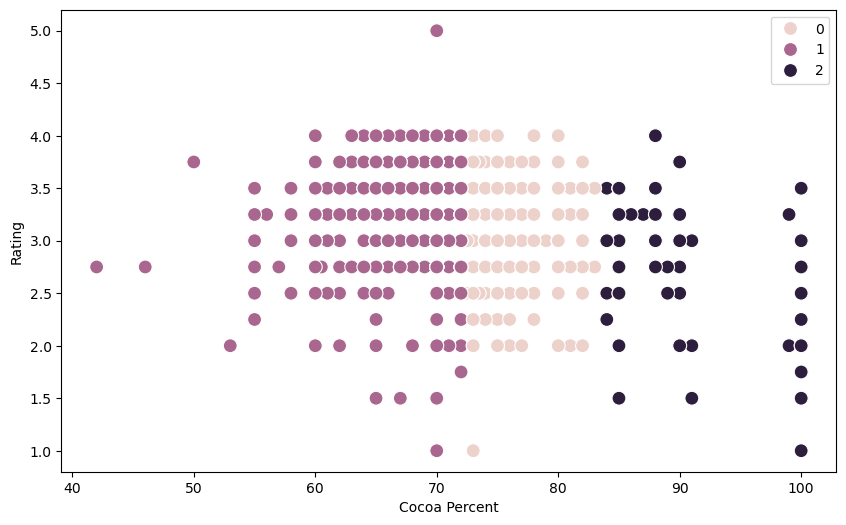

In [17]:
# Plot the clusters for the "Rating" and "Cocoa Percent" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df1['Cocoa Percent'], y=df['Rating'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Cocoa Percent') 
plt.ylabel('Rating') 
plt.show()

### Higher cocoa percentages (above 80%) tend to have more extreme low ratings 
### Chocolates in the 60-75% range seem to be the most consistently rated (~3.0-3.5), indicating they may be the most preferred.
### Lower cocoa percentages (below 60%) are rare in this dataset, and when they do appear, they tend to have medium-to-low ratings.

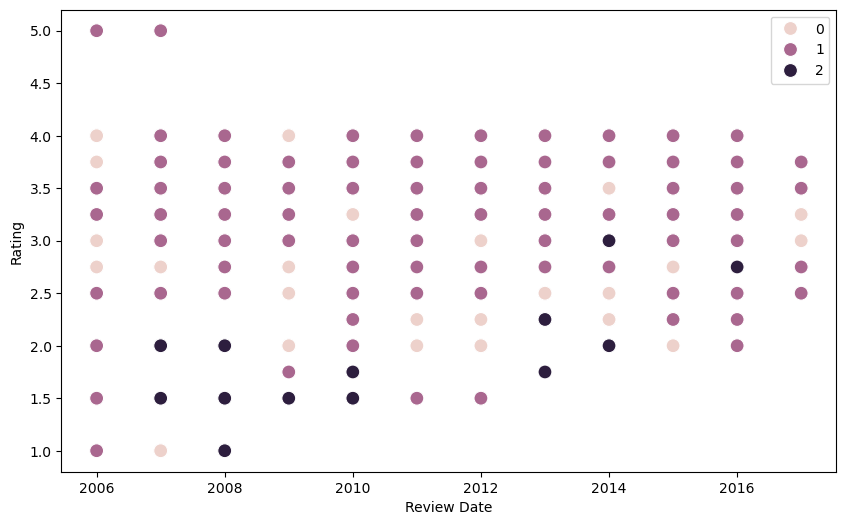

In [18]:
# Plot the clusters for the "Review Date" and "Rating" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df1['Review Date'], y=df1['Rating'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Review Date') 
plt.ylabel('Rating') 
plt.show()

### The proportion of very low-rated chocolates (dark purple) seems to have decreased over time, possibly indicating an improvement in chocolate quality or changes in rating standards.
### Most chocolates fall into the average-to-good rating range (~3.0-4.0), regardless of the year.

In [19]:
### Separate the data points in each cluster 
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\User\AppData\Local\Temp\ipykernel_9508\451735625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'


In [20]:
###  Calculate the descriptive statistics of each cluster
df1.groupby('cluster').agg({'Review Date':['mean', 'median'], 
                         'Cocoa Percent':['mean', 'median'],
                          'Rating':['mean', 'median']})

Review Date         Cocoa Percent           Rating       
                    mean  median          mean median      mean median
cluster                                                               
dark purple  2011.662791  2012.5     89.825581   87.5  2.784884   3.00
pink         2012.417178  2013.0     76.092025   75.0  3.135481   3.25
purple       2012.335521  2013.0     68.656686   70.0  3.235029   3.25

### The dark purple cluster has the highest cocoa percentage (mean: ~89.83%) but the lowest average rating (2.78).
### The purple cluster has the lowest cocoa percentage (~68.66%) but the highest rating (3.25, same as pink).
### This supports the earlier hypothesis that higher cocoa percentages tend to be rated lower, which aligns with the trend observed in my regression analysis.
### However, pink and purple clusters have similar ratings (3.25) despite different cocoa percentages, suggesting that factors other than cocoa percentage (e.g., brand, bean origin) might play a role in ratings.
### The results of the clustering show that checking if other factors like bean origin or brand explain rating differences is recommended. Also, these clusters can be useful for predicting chocolate ratings based on features like cocoa percent and review year.